<a href="https://colab.research.google.com/github/creative-devloper/Data-Science/blob/main/Cat_Dog_MWF_4_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle # creating .kaggle folder to store kaggle file
!cp kaggle.json ~/.kaggle/ # copying the kaggle.json in kaggle folder
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d salader/dogsvscats

Dataset URL: https://www.kaggle.com/datasets/salader/dogsvscats
License(s): unknown
 97% 1.04G/1.06G [00:12<00:00, 119MB/s]
100% 1.06G/1.06G [00:12<00:00, 94.4MB/s]


In [ ]:
!unzip /content/dogsvscats.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dogs/dog.4419.jpg  
  inflating: train/dogs/dog.442.jpg  
  inflating: train/dogs/dog.4420.jpg  
  inflating: train/dogs/dog.4421.jpg  
  inflating: train/dogs/dog.4422.jpg  
  inflating: train/dogs/dog.4424.jpg  
  inflating: train/dogs/dog.4425.jpg  
  inflating: train/dogs/dog.4426.jpg  
  inflating: train/dogs/dog.4427.jpg  
  inflating: train/dogs/dog.4431.jpg  
  inflating: train/dogs/dog.4433.jpg  
  inflating: train/dogs/dog.4436.jpg  
  inflating: train/dogs/dog.4438.jpg  
  inflating: train/dogs/dog.4439.jpg  
  inflating: train/dogs/dog.444.jpg  
  inflating: train/dogs/dog.4440.jpg  
  inflating: train/dogs/dog.4441.jpg  
  inflating: train/dogs/dog.4442.jpg  
  inflating: train/dogs/dog.4443.jpg  
  inflating: train/dogs/dog.4444.jpg  
  inflating: train/dogs/dog.4445.jpg  
  inflating: train/dogs/dog.4446.jpg  
  inflating: train/dogs/dog.445.jpg  
  inflating: train/dogs/dog.4450.jpg  
  inflating: tra

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
import cv2
import imghdr
import os
import random

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras import layers,models



/tmp/ipython-input-938849288.py:8: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [ ]:
#  os.listdir('/content/dogs_vs_cats/test/cats')

['cat.3481.jpg',
 'cat.8372.jpg',
 'cat.4173.jpg',
 'cat.1088.jpg',
 'cat.6602.jpg',
 'cat.8259.jpg',
 'cat.6915.jpg',
 'cat.11506.jpg',
 'cat.2773.jpg',
 'cat.390.jpg',
 'cat.8483.jpg',
 'cat.9560.jpg',
 'cat.4277.jpg',
 'cat.9390.jpg',
 'cat.1118.jpg',
 'cat.10407.jpg',
 'cat.8538.jpg',
 'cat.1808.jpg',
 'cat.4135.jpg',
 'cat.731.jpg',
 'cat.2657.jpg',
 'cat.4380.jpg',
 'cat.3763.jpg',
 'cat.9671.jpg',
 'cat.12350.jpg',
 'cat.7246.jpg',
 'cat.5252.jpg',
 'cat.1130.jpg',
 'cat.9508.jpg',
 'cat.6953.jpg',
 'cat.1039.jpg',
 'cat.766.jpg',
 'cat.726.jpg',
 'cat.7041.jpg',
 'cat.6654.jpg',
 'cat.6375.jpg',
 'cat.3407.jpg',
 'cat.1258.jpg',
 'cat.2995.jpg',
 'cat.8389.jpg',
 'cat.7021.jpg',
 'cat.4641.jpg',
 'cat.10439.jpg',
 'cat.2584.jpg',
 'cat.10756.jpg',
 'cat.10849.jpg',
 'cat.3474.jpg',
 'cat.1899.jpg',
 'cat.4424.jpg',
 'cat.4607.jpg',
 'cat.5208.jpg',
 'cat.9007.jpg',
 'cat.5446.jpg',
 'cat.158.jpg',
 'cat.12124.jpg',
 'cat.2666.jpg',
 'cat.4044.jpg',
 'cat.8382.jpg',
 'cat.11338.

In [ ]:
def plot_the_images_from_directory(directory_path,class_animal, num_images=9):
  image_filenames = os.listdir(directory_path)
  if len(image_filenames)<num_images:
    print(f"Only {len(image_filenames)} images found in {directory_path}, displaying all. ")
    num_images = len(image_filenames)

  selected_images = random.sample(image_filenames,num_images)

  fig, axes = plt.subplots(3,3,figsize=(8,8))
  axes = axes.ravel()

  for i,image_filename in enumerate(selected_images):
    image_path = os.path.join(directory_path,image_filename)
    image = load_img(image_path)
    axes[i].imshow(image)
    axes[i].axis('off')
    axes[i].set_title(class_animal)
  plt.show()


In [ ]:
l = [11,12,13,14,15]
for i,a in enumerate(l):
  print(i,a)

0 11
1 12
2 13
3 14
4 15


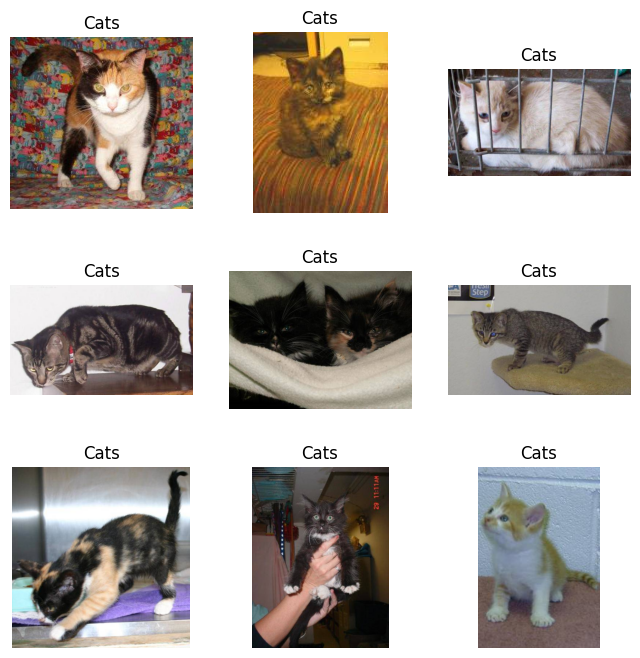

In [ ]:
# plot_the_images_from_directory('/content/catsvsdogs/train/dogs',"DOGS")
plot_the_images_from_directory('/content/catsvsdogs/train/cats',"Cats")

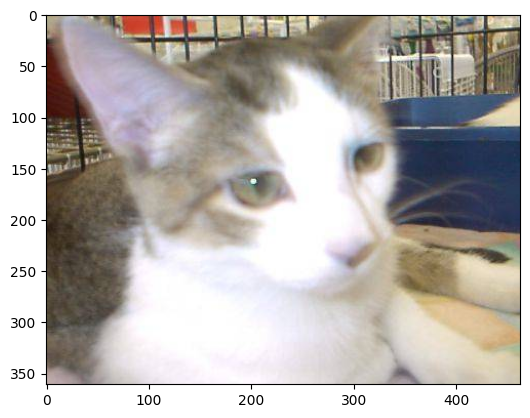

In [ ]:
# os.path.join('/content/dogs_vs_cats/test/cats','cat.5312.jpg')
img = Image.open('/content/dogs_vs_cats/test/cats/cat.5312.jpg')
plt.imshow(img)

In [ ]:
# a = np.array([[1,2],])

In [ ]:
# a.ravel()

array([1, 2])

In [ ]:
# a= [1,2,3,4,5]


In [ ]:
# for i,a in enumerate(a):
#   print(i)

0
1
2
3
4


In [ ]:
cat_directory_path = '/content/dogs_vs_cats/test/cats'

dog_directory_path = '/content/dogs_vs_cats/train/dogs'

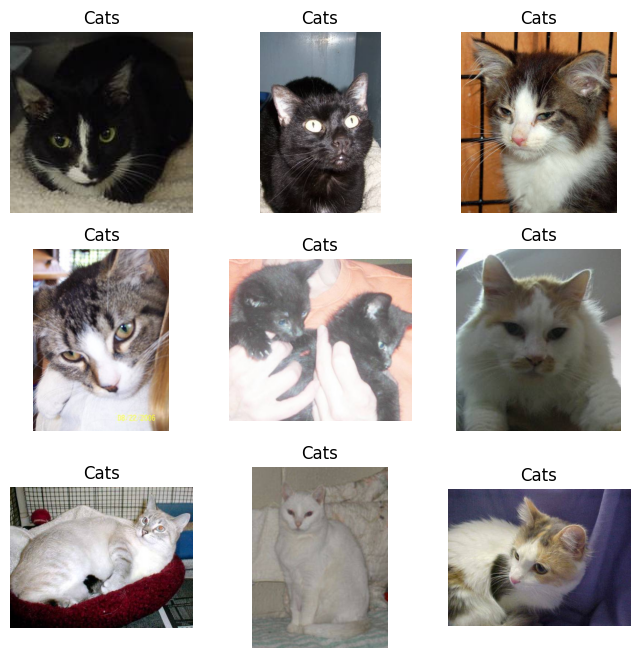

In [ ]:
plot_the_images_from_directory(cat_directory_path,'Cats')

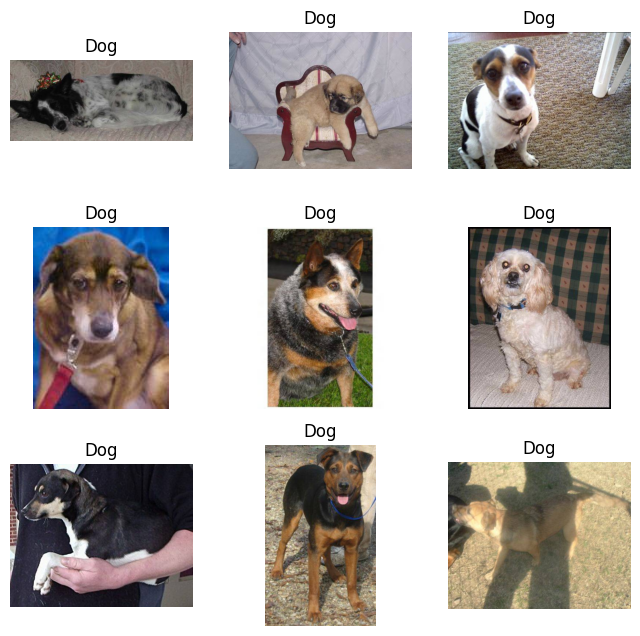

In [ ]:
plot_the_images_from_directory('/content/dogs_vs_cats/test/dogs','Dog')

In [ ]:
cat_images_train = os.listdir('/content/catsvsdogs/train/cats')
cat_images_test = os.listdir('/content/catsvsdogs/test/cats')
dog_images_train = os.listdir('/content/catsvsdogs/train/dogs')
dog_images_test = os.listdir('/content/catsvsdogs/test/dogs')

In [ ]:
print(f"training data for cat {len(cat_images_train)}")
print(f"Testing data for cat {len(cat_images_test)}")
print(f"training data for dog {len(dog_images_train)}")
print(f"testing data for dog {len(dog_images_test)}")

training data for cat 10000
Testing data for cat 2500
training data for dog 10000
testing data for dog 2500


In [ ]:
img_exts = ['jpeg','jpg','png']
data_dir = '/content/catsvsdogs'


for root,dir,files in os.walk(data_dir):
  for file in files:
    file_path = os.path.join(root,file)
    try:
      file_type = imghdr.what(file_path)
      if file_type not in img_exts:
        print(f"Image not in ext list {file_path}")
        os.remove(file_path)
    except Exception as e:
      print(f"Issue with image {file_path}, Error: {e}")
      os.remove(file_path)

In [ ]:
for root,dir,files in os.walk(data_dir):
  print(files)

[]
[]
['dog.10067.jpg', 'dog.9246.jpg', 'dog.5443.jpg', 'dog.9035.jpg', 'dog.311.jpg', 'dog.8675.jpg', 'dog.4868.jpg', 'dog.1372.jpg', 'dog.3024.jpg', 'dog.11507.jpg', 'dog.4345.jpg', 'dog.10881.jpg', 'dog.10931.jpg', 'dog.75.jpg', 'dog.11218.jpg', 'dog.3117.jpg', 'dog.3486.jpg', 'dog.6287.jpg', 'dog.9606.jpg', 'dog.7435.jpg', 'dog.8343.jpg', 'dog.10059.jpg', 'dog.12442.jpg', 'dog.8319.jpg', 'dog.3969.jpg', 'dog.7549.jpg', 'dog.5781.jpg', 'dog.9736.jpg', 'dog.12060.jpg', 'dog.5111.jpg', 'dog.3242.jpg', 'dog.580.jpg', 'dog.11249.jpg', 'dog.846.jpg', 'dog.11172.jpg', 'dog.5894.jpg', 'dog.6449.jpg', 'dog.7717.jpg', 'dog.7294.jpg', 'dog.9558.jpg', 'dog.3744.jpg', 'dog.8782.jpg', 'dog.6423.jpg', 'dog.3908.jpg', 'dog.11355.jpg', 'dog.12018.jpg', 'dog.9197.jpg', 'dog.9656.jpg', 'dog.3476.jpg', 'dog.7021.jpg', 'dog.7577.jpg', 'dog.3481.jpg', 'dog.525.jpg', 'dog.3725.jpg', 'dog.5377.jpg', 'dog.11934.jpg', 'dog.564.jpg', 'dog.8528.jpg', 'dog.2784.jpg', 'dog.9556.jpg', 'dog.6632.jpg', 'dog.2978.j

In [ ]:
imghdr.what('/content/catsvsdogs/test/dogs/dog.10006.jpg')

'jpeg'

In [ ]:
def image_to_array(image_path):
  try:
    with Image.open(image_path) as img:
      image_array = np.array(img)
      return image_array
  except Exception as e:
    print(f"Error converting image to array: {e}")
    return None

array([[[158, 148, 138],
        [159, 149, 139],
        [160, 150, 140],
        ...,
        [185, 187, 186],
        [202, 204, 203],
        [222, 224, 223]],

       [[159, 149, 139],
        [160, 150, 140],
        [161, 151, 141],
        ...,
        [184, 186, 185],
        [200, 202, 201],
        [222, 224, 223]],

       [[160, 150, 140],
        [161, 151, 141],
        [162, 152, 142],
        ...,
        [181, 182, 184],
        [199, 200, 202],
        [220, 221, 223]],

       ...,

       [[ 75,  77,  74],
        [ 74,  76,  73],
        [ 72,  74,  71],
        ...,
        [138, 133, 114],
        [135, 129, 113],
        [139, 134, 115]],

       [[ 70,  72,  69],
        [ 69,  71,  68],
        [ 67,  69,  66],
        ...,
        [128, 123, 103],
        [122, 117,  98],
        [127, 122, 102]],

       [[ 69,  71,  68],
        [ 69,  71,  68],
        [ 67,  69,  66],
        ...,
        [125, 120, 100],
        [117, 112,  92],
        [123, 118,  98]]], dtype=uint8)
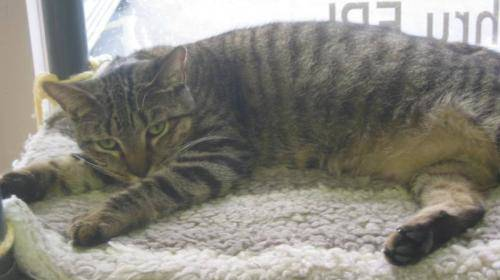

In [ ]:
image_to_array('/content/dogs_vs_cats/test/cats/cat.10017.jpg')

In [ ]:
image ='/content/dogs_vs_cats/test/cats/cat.10017.jpg'
img = cv2.imread(image)
if img is not None:
  print(img)
  print(img.shape)
else:
  print("image cannot be loaded")

[[[138 148 158]
  [139 149 159]
  [140 150 160]
  ...
  [186 187 185]
  [203 204 202]
  [223 224 222]]

 [[139 149 159]
  [140 150 160]
  [141 151 161]
  ...
  [185 186 184]
  [201 202 200]
  [223 224 222]]

 [[140 150 160]
  [141 151 161]
  [142 152 162]
  ...
  [184 182 181]
  [202 200 199]
  [223 221 220]]

 ...

 [[ 74  77  75]
  [ 73  76  74]
  [ 71  74  72]
  ...
  [114 133 138]
  [113 129 135]
  [115 134 139]]

 [[ 69  72  70]
  [ 68  71  69]
  [ 66  69  67]
  ...
  [103 123 128]
  [ 98 117 122]
  [102 122 127]]

 [[ 68  71  69]
  [ 68  71  69]
  [ 66  69  67]
  ...
  [100 120 125]
  [ 92 112 117]
  [ 98 118 123]]]
(280, 500, 3)


array([[[138, 148, 158],
        [139, 149, 159],
        [140, 150, 160],
        ...,
        [186, 187, 185],
        [203, 204, 202],
        [223, 224, 222]],

       [[139, 149, 159],
        [140, 150, 160],
        [141, 151, 161],
        ...,
        [185, 186, 184],
        [201, 202, 200],
        [223, 224, 222]],

       [[140, 150, 160],
        [141, 151, 161],
        [142, 152, 162],
        ...,
        [184, 182, 181],
        [202, 200, 199],
        [223, 221, 220]],

       ...,

       [[ 74,  77,  75],
        [ 73,  76,  74],
        [ 71,  74,  72],
        ...,
        [114, 133, 138],
        [113, 129, 135],
        [115, 134, 139]],

       [[ 69,  72,  70],
        [ 68,  71,  69],
        [ 66,  69,  67],
        ...,
        [103, 123, 128],
        [ 98, 117, 122],
        [102, 122, 127]],

       [[ 68,  71,  69],
        [ 68,  71,  69],
        [ 66,  69,  67],
        ...,
        [100, 120, 125],
        [ 92, 112, 117],
        [ 98, 118, 123]]], dtype=uint8)
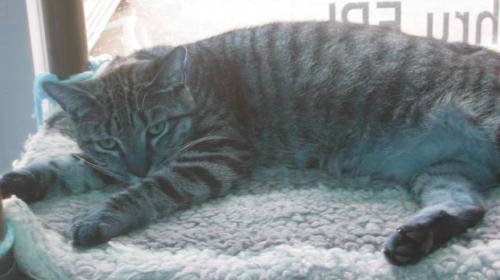

In [ ]:
img

In [ ]:
base_dir = '/content/catsvsdogs/train'
train_datagen = ImageDataGenerator(rescale = 1/255,validation_split=0.2)

In [ ]:
train_datagen


In [ ]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary',
    subset = 'training'
)
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (150,150),
    batch_size=32,
    class_mode = 'binary',
    subset = 'validation'
)

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [ ]:
images,labels = next(train_generator)

images = (32,150,150,3)

In [ ]:
labels

array([1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0.],
      dtype=float32)

In [ ]:
labels

array([0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.],
      dtype=float32)

In [ ]:
len(labels)

32

In [ ]:
train_classes_lables = train_generator.class_indices
train_classes_lables

{'cats': 0, 'dogs': 1}

In [ ]:
validation_classes_lables = validation_generator.class_indices
validation_classes_lables

{'cats': 0, 'dogs': 1}

In [ ]:
def plot_images_from_generator(generator, num_images=4):
  images,labels = next(train_generator)

  fig, axes = plt.subplots(1,num_images,figsize=(20,20))
  axes = axes.ravel()

  for img,label,ax in zip(images,labels,axes):
    ax.imshow(img)
    class_label = dict((v,k) for k,v in generator.class_indices.items())
    ax.set_title(class_label[int(label)])
    ax.axis('off')
  plt.tight_layout()
  plt.show()

In [ ]:
dict((v,k) for k,v in validation_generator.class_indices.items())

{0: 'cats', 1: 'dogs'}

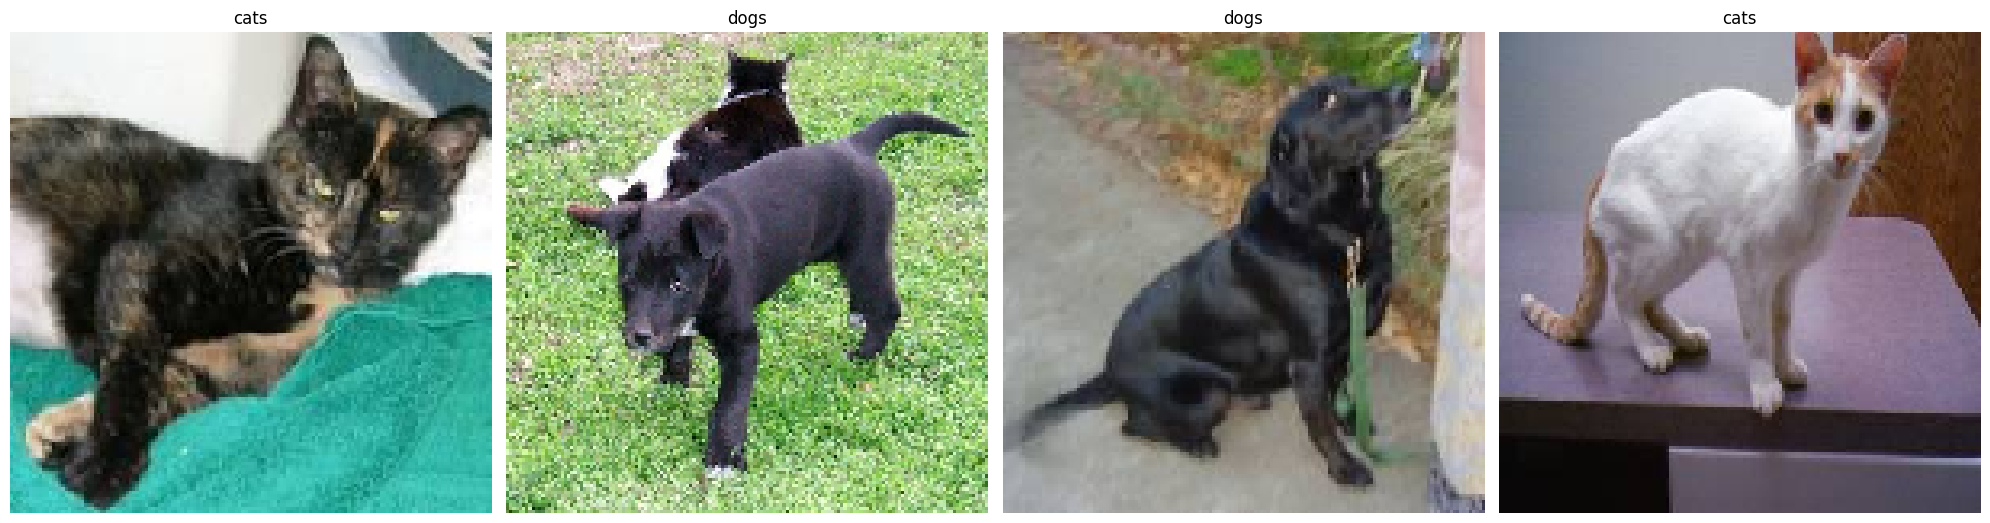

In [ ]:
plot_images_from_generator(validation_generator)

In [ ]:
model = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(256,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,811,969 (25.99 MB)

 Trainable params: 6,811,969 (25.99 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.utils import plot_model

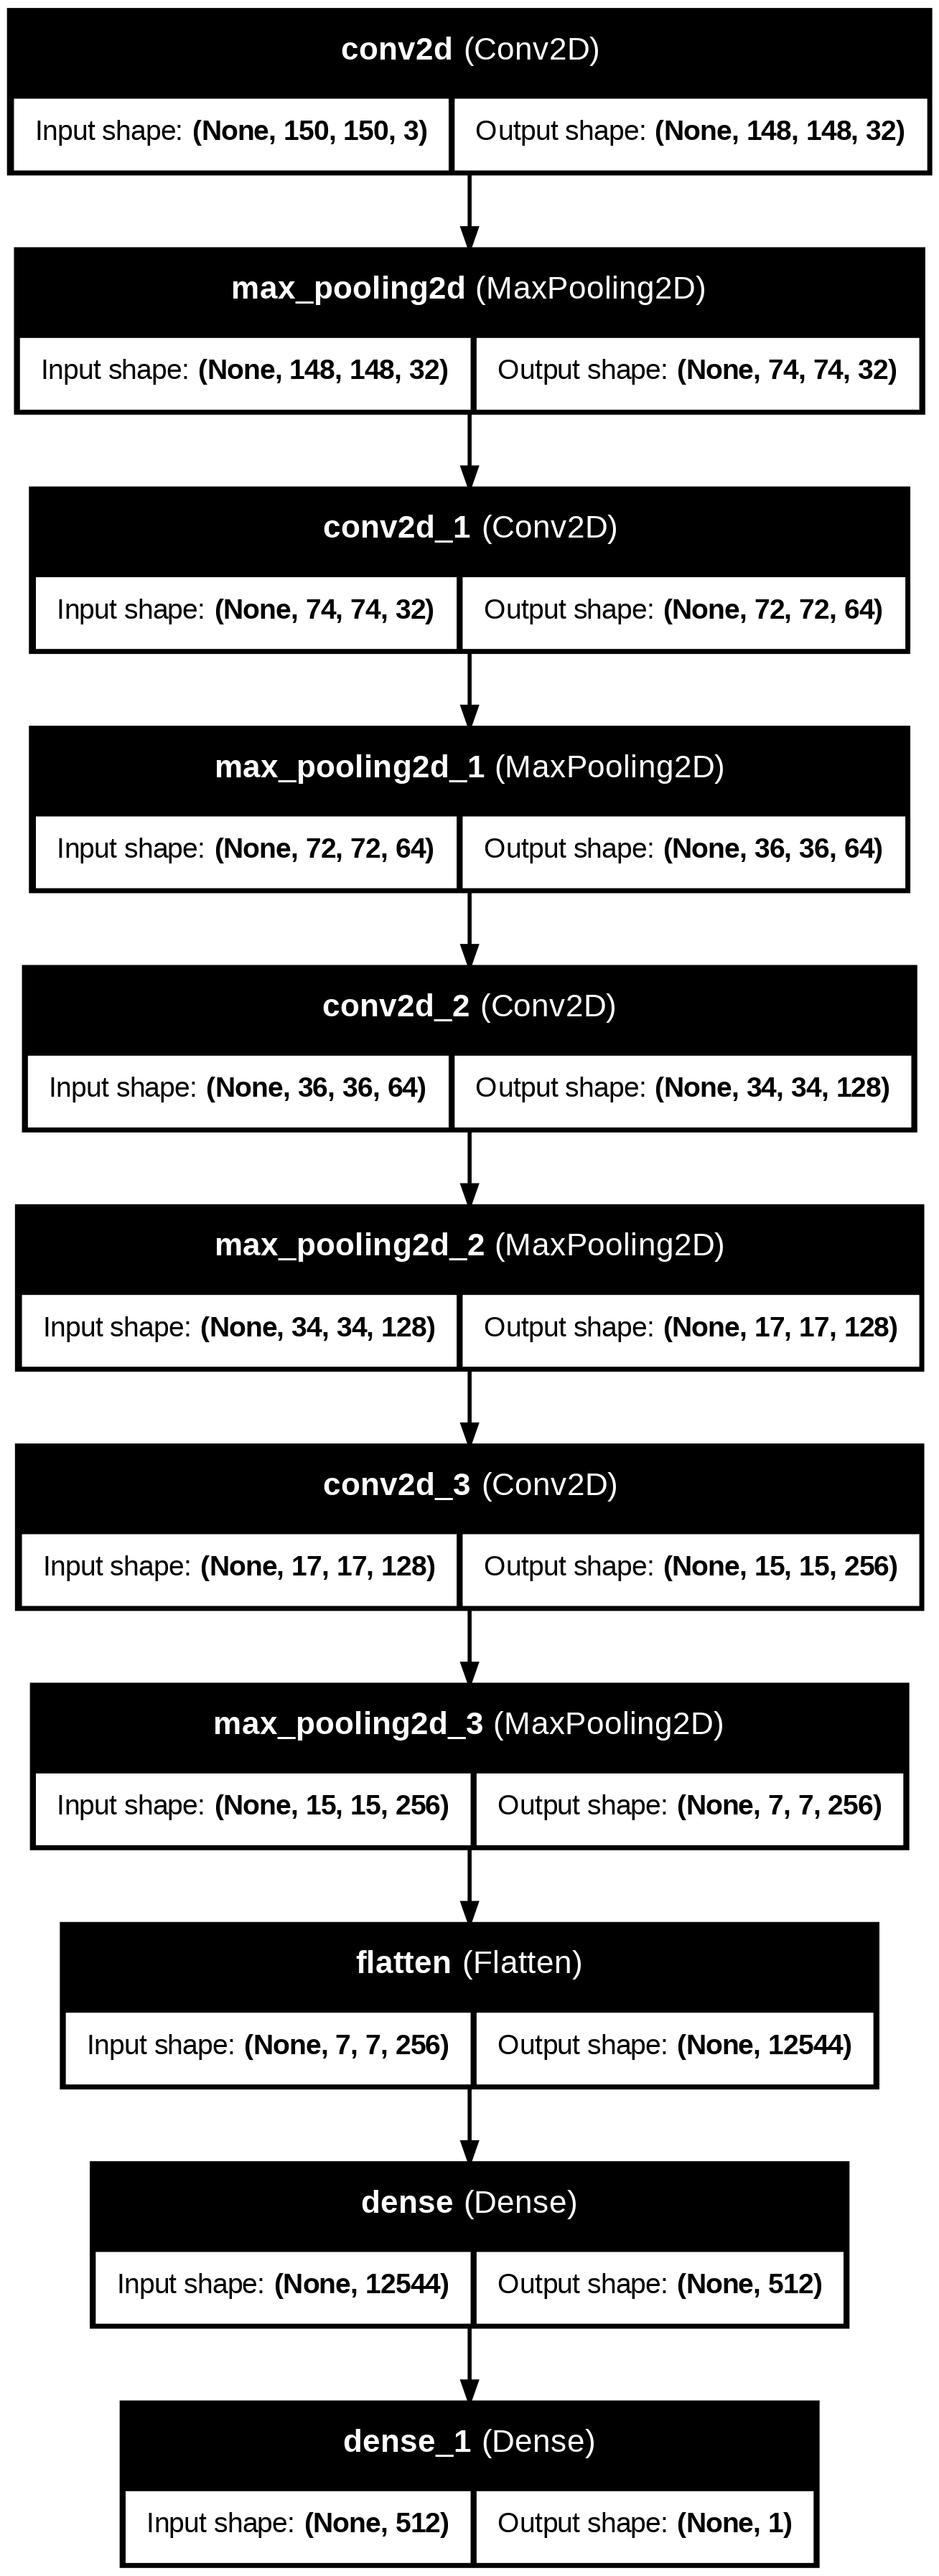

In [ ]:
plot_model(model,to_file ='CNN_architecture.png',show_shapes = True,show_layer_names = True)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
batch = 20
train_steps = np.ceil(train_generator.samples/batch)
val_steps = np.ceil(validation_generator.samples/batch)

In [ ]:
train_steps

np.float64(800.0)

In [ ]:
val_steps

np.float64(200.0)

In [ ]:
h= model.fit(train_generator,
             steps_per_epoch = int(train_steps),
             epochs = 10,
             validation_data=validation_generator,
             validation_steps = int(val_steps))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


500/800 ━━━━━━━━━━━━━━━━━━━━ 16s 55ms/step - accuracy: 0.5286 - loss: 0.6976

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


800/800 ━━━━━━━━━━━━━━━━━━━━ 44s 47ms/step - accuracy: 0.5455 - loss: 0.6860 - val_accuracy: 0.6620 - val_loss: 0.6057
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 34s 42ms/step - accuracy: 0.6754 - loss: 0.5879 - val_accuracy: 0.6957 - val_loss: 0.5716
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 39s 40ms/step - accuracy: 0.7625 - loss: 0.4812 - val_accuracy: 0.7970 - val_loss: 0.4307
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.8275 - loss: 0.3866 - val_accuracy: 0.8338 - val_loss: 0.3822
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.8623 - loss: 0.3196 - val_accuracy: 0.8553 - val_loss: 0.3334
Epoch 6/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.8909 - loss: 0.2552 - val_accuracy: 0.8652 - val_loss: 0.3226
Epoch 7/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.9180 - loss: 0.1994 - val_accuracy: 0.8727 - val_loss: 0.3198
Epoch 8/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.9424 - loss: 0.1435 - val_accurac

In [ ]:
test_datagen = ImageDataGenerator(rescale=1/255)
test_dir = '/content/test'
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    batch_size=20,
    class_mode = 'binary',
    shuffle = False
)


Found 5000 images belonging to 2 classes.


In [ ]:
test_step = int(np.ceil(test_generator.samples/batch))

In [ ]:
test_step

250

In [ ]:
prob = model.predict(test_generator,steps=test_step)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step


In [ ]:
prob

array([[0.49448416],
       [0.48813602],
       [0.49807358],
       ...,
       [0.4898723 ],
       [0.4978068 ],
       [0.49433583]], dtype=float32)

In [ ]:
test_generator.reset()
true_classes = test_generator.classes #actual data

predicted_classes = prob.astype(int).squeeze()

In [ ]:
true_classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
prob.astype(int).squeeze()

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
class_lables = list(test_generator.class_indices.keys())

In [ ]:
class_lables

['cats', 'dogs']

In [ ]:
loss,accuracy = model.evaluate(test_generator,steps=test_step)

ValueError: You must call `compile()` before using the model.

In [ ]:
accuracy

0.8772000074386597